## Problem: Predicting heart disease
## Methodology: Gaussian Mixture Models 
## Data: Heart disease dataset from the UC Irvine Machine Learning
### GMMs are generative models assuming the data is generated by a mixture of several multivariate Gaussian distributions. GMM searches for the Gaussian distributions for each of the clusters in the data. Since the full data is the combination of all of the clusters, GMM models the data as a mixture of the Gaussian distributions where the number of these distributions is equal to the number of clusters in the data. The algorithms aims to estimate the mean and covariance matrices of these distributions.
### This methodology generalizes the K-Means algorithms by adding covariance among features so that clusers can be ellipsoids rather than spheres, while the centroids are represented by the means of each distribution. Their performance is considered soft as their assignment to each point has the probability to be a member of any cluster.


#### How a GMM works:
1. Initialization—Assume random centroids (for example, using centroids of the k-means solution as the initial values of 𝜇𝑐)
2. Repeat the following steps until convergence (or the log likelihoos value stops to increase above a threshold):
2.1 Expectation step: Soft assignment — compute probabilities for each point from each distribution
2.2 Maximization step: Adjust normal-distribution parameters to make data points most likely. We perform this by evaluating the log likelihood of the data. Likelihood measures the probability of the data being generated by the Gaussians with the parameters calculated in the previous steps. GMM's goal is to maximize this log likelihood. 

Mind GMM releases two of the assumptions of k-means, a) that the clusters are isotropic and b) have the similar variances. 

#### Assumptions
- There are k distributions that generate the data. In effect, this is equivalent to say that there are exactly k clusters in the data.

- All of these k distributions are Gaussians.

In [68]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches
from matplotlib.patches import Ellipse

import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")
from numpy import percentile
from numpy.random import seed
import os
import datetime
from sqlalchemy import create_engine
import scipy
from scipy.special import comb

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
import sklearn.metrics as metrics
import sklearn.metrics as metricser
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [70]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', -1) 

In [71]:
# Get the data from remote database
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [72]:
# Save the data locally
#path = 'c:\\Analytics\\education_pipeline\\data'
path = 'c:\\Users\\User\\Dropbox\\dev_data\\thinkful'
os.chdir(path)
export_location = os.path.join(path, 't.csv') ### File


def to_csv(self, path, index=True, sep=",", na_rep='', float_format=None,
           header=False, index_label=None, mode='w', nanRep=None,
           encoding=None, date_format=None, decimal='.'):
    """
    Write Series to a comma-separated values (csv) file
    ...
    """
    from pandas.core.frame import DataFrame
    df = DataFrame(self)
    # result is only a string if no path provided, otherwise None
    result = df.to_csv(path, index=index, sep=sep, na_rep=na_rep,
                       float_format=float_format, header=header,
                       index_label=index_label, mode=mode, nanRep=nanRep,
                       encoding=encoding, date_format=date_format,
                       decimal=decimal)
    if path is None:
        return result

In [73]:
# Read the date
#path1 = 'c:\\dev_data\\1st_project\\thinkful'
path1 = 'c:\\Users\\User\\Dropbox\\dev_data\\thinkful'

os.chdir(path1)
heartdisease_df_file = os.path.join(path1, 'heartdisease.csv')     ### File
heartdisease_df = pd.read_csv(heartdisease_df_file)  

In [74]:
# Make sure the number of rows divides evenly into four samples.
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]
df = df.replace(to_replace='?', value=0)

# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13].astype(float)

# Replace some random string values.
X = X.replace(to_replace='?', value=0)
del X['Unnamed: 0']
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [75]:
# Normalize
X_std = StandardScaler().fit_transform(X)

In [131]:
# Defining the agglomerative clustering with "full" covariance
gmm_cluster = GaussianMixture(n_components=2, covariance_type='full', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [ ]:
# To visualize the results we use PCA with two components
# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

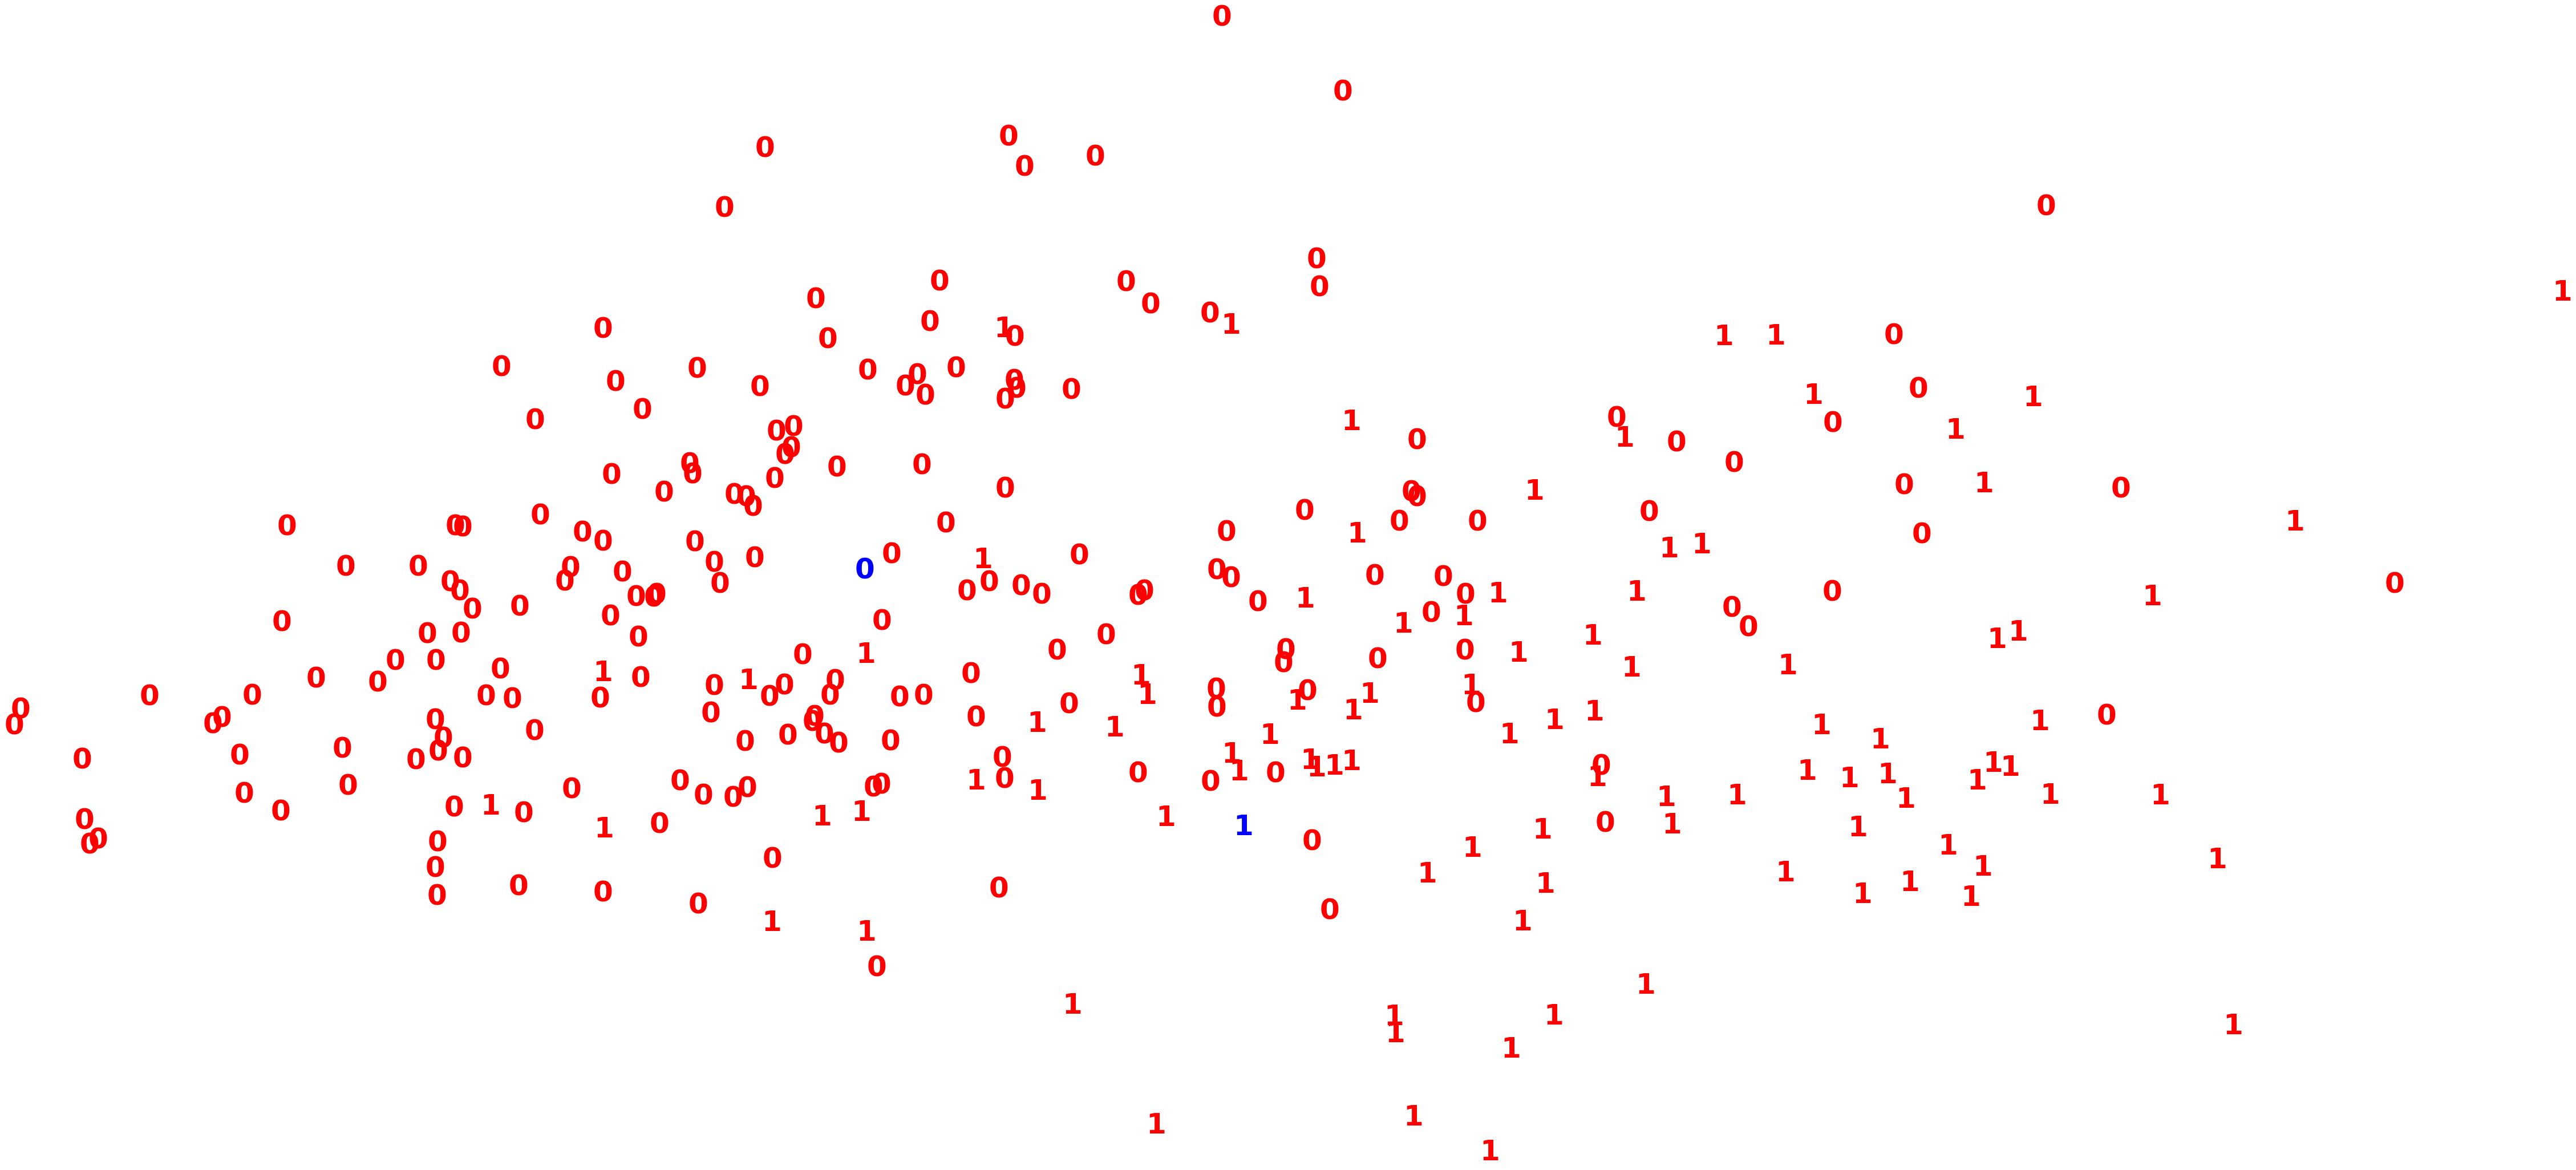

In [132]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [134]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.0034412597466753486
The silhoutte score of the GMM solution: 0.13890565152813986


In [124]:
# To demonstrate the soft clustering aspect of the GMM, ee draw the same graph above this time by resizing the points according to the highest probability assigned to them by the winning cluster:

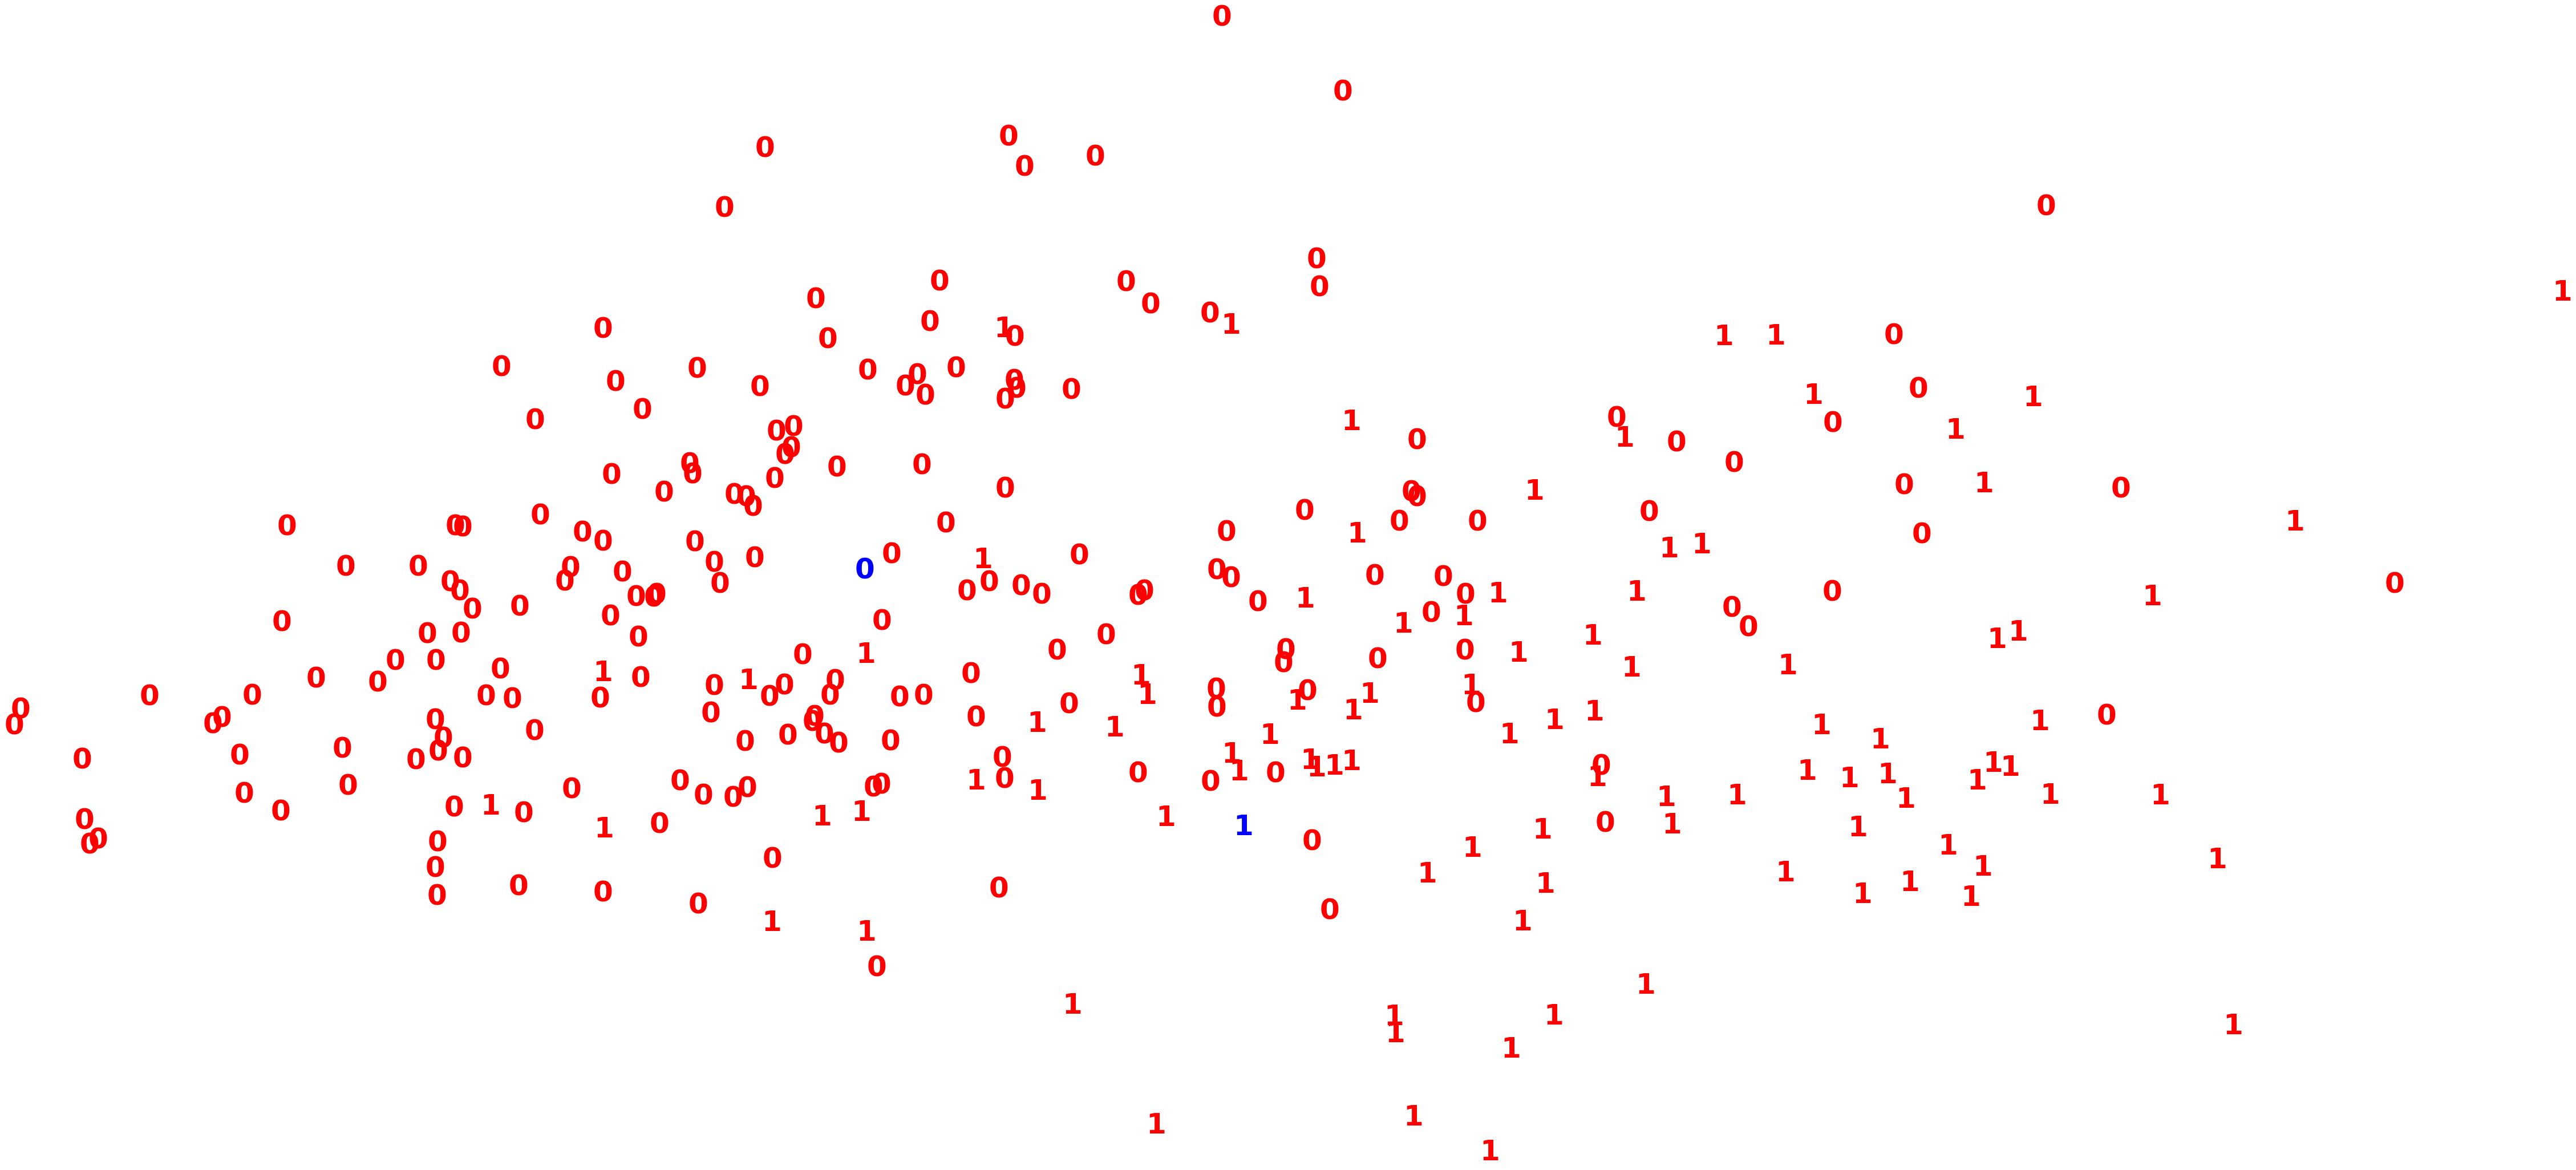

In [125]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Check which covariance parameter gives the best resutl

In [140]:
# Defining the clustering
gmm_cluster = GaussianMixture(n_components=2, covariance_type='tied', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.0034412597466753486
The silhoutte score of the GMM solution: 0.13890565152813986


In [141]:
# Defining the clustering with different covariance
gmm_cluster = GaussianMixture(n_components=2, covariance_type='diag', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.0034412597466753486
The silhoutte score of the GMM solution: 0.13890565152813986


In [142]:
# Defining the clustering with different covariance
gmm_cluster = GaussianMixture(n_components=2, covariance_type='spherical', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.00043138595001330143
The silhoutte score of the GMM solution: 0.134205164568444


## All combination of covariance parameter perform poorly.